In [1]:
!pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.2 MB/s eta 0:00:00


# Import Libraries

In [17]:
import google.generativeai as genai

In [19]:
from google.colab import userdata
# load API
from dotenv import load_dotenv
from IPython.display import display
from IPython.display import Markdown
import textwrap

# Setup API Key

In [20]:
GOOGLE_API_KEY = userdata.get('GeminiProKey')
genai.configure(api_key=GOOGLE_API_KEY)

In [22]:
# create a new .env and store the api
!echo -e 'GOOGLE_API_KEY= TYPE YOUR KEY' > .env

In [25]:
!ls -a

.  ..  .config	.env  pdfs  sample_data


In [26]:
load_dotenv()

True

In [8]:
# convert into formatted text
def to_markdown(text):
  text = text.replace('•','*')
  return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

# Gemini Models

In [9]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [10]:
model = genai.GenerativeModel('gemini-pro')

In [11]:
%%time
response = model.generate_content("Introverts and Extroverts")

CPU times: user 237 ms, sys: 24.3 ms, total: 261 ms
Wall time: 19.7 s


In [12]:
response

In [13]:
response.text

"**Introverts and Extroverts: Understanding the Differences**\n\nIntroverts and extroverts are two distinct personality types that exhibit different behaviors and preferences in social situations. While introverts tend to be more reserved and prefer solitude, extroverts are more outgoing and energized by social interactions. Understanding the differences between these two personality types can help us better appreciate individuals with diverse social preferences and foster more inclusive and harmonious environments.\n\n**Key Differences Between Introverts and Extroverts**\n\n1. **Social Energy:**\n\n   - Introverts: Introverts draw their energy from within and prefer to spend time alone or in small groups. They may feel drained or overwhelmed in large social gatherings.\n\n   - Extroverts: Extroverts gain energy from social interactions and thrive in large groups. They enjoy being around others and may feel restless or antsy when alone.\n\n\n2. **Communication Styles:**\n\n   - Introve

In [14]:
to_markdown(response.text)

>**Introverts and Extroverts: Understanding the Differences**
>
>Introverts and extroverts are two distinct personality types that exhibit different behaviors and preferences in social situations. While introverts tend to be more reserved and prefer solitude, extroverts are more outgoing and energized by social interactions. Understanding the differences between these two personality types can help us better appreciate individuals with diverse social preferences and foster more inclusive and harmonious environments.
>
>**Key Differences Between Introverts and Extroverts**
>
>1. **Social Energy:**
>
>   - Introverts: Introverts draw their energy from within and prefer to spend time alone or in small groups. They may feel drained or overwhelmed in large social gatherings.
>
>   - Extroverts: Extroverts gain energy from social interactions and thrive in large groups. They enjoy being around others and may feel restless or antsy when alone.
>
>
>2. **Communication Styles:**
>
>   - Introverts: Introverts tend to be more thoughtful and deliberate in their communication. They prefer to listen and reflect before speaking, and may prefer written communication over verbal conversations.
>
>   - Extroverts: Extroverts are more outgoing and expressive in their communication. They may speak quickly and enthusiastically, and enjoy engaging in lively conversations.
>
>
>3. **Comfort Zones:**
>
>   - Introverts: Introverts typically feel most comfortable in quiet, low-stimulation environments. They may prefer spending time alone or in small groups, engaging in activities that allow for reflection and introspection.
>
>   - Extroverts: Extroverts thrive in high-energy, social environments. They enjoy being surrounded by people and may seek out opportunities to socialize and connect with others.
>
>
>4. **Decision-Making:**
>
>   - Introverts: Introverts often prefer to take their time when making decisions. They may gather information, reflect on options, and weigh pros and cons before coming to a conclusion.
>
>   - Extroverts: Extroverts may be more impulsive and decisive in their decision-making. They may rely on their gut instinct and intuition, and may prefer to act quickly rather than overthinking.
>
>
>5. **Recharge Time:**
>
>   - Introverts: Introverts need time alone to recharge their social batteries. After social interactions, they may seek solitude to reflect, process information, and restore their energy levels.
>
>   - Extroverts: Extroverts often feel energized by social interactions and may not need as much alone time to recharge. They may crave social stimulation and may feel restless when they are alone for extended periods.
>
>**Respecting Differences and Promoting Inclusion:**
>
>Understanding the differences between introverts and extroverts is essential for promoting inclusivity and尊重. It's important to recognize that both personality types have their strengths and contributions to society. Creating environments that cater to both introverts and extroverts can help foster a sense of belonging and well-being for all individuals.
>
>Here are some tips for fostering inclusivity and respecting the preferences of both introverts and extroverts:
>
>- **Create a variety of social opportunities:** Offer a mix of social events that cater to both introverts and extroverts. This can include small group discussions, one-on-one conversations, workshops, seminars, and social gatherings.
>
>- **Provide quiet spaces:** Dedicate quiet areas where introverts can retreat to recharge and reflect. This can be a reading room, a meditation room, or a designated area for individuals to work or study independently.
>
>- **Encourage introverts to participate:** Encourage introverts to share their thoughts and ideas in group settings. Provide opportunities for them to contribute in ways that align with their preferences, such as written feedback, small group discussions, or one-on-one conversations.
>
>- **Respect the need for alone time:** Recognize that introverts may need time alone to recharge. Encourage them to take breaks during social events or long meetings to rejuvenate.
>
>- **Promote understanding and empathy:** Educate individuals about the differences between introversion and extroversion. Encourage open dialogue and foster a culture of mutual respect and understanding among people with varying social preferences.
>
>By understanding and respecting the differences between introverts and extroverts, we can create inclusive environments that value diverse perspectives and foster a sense of belonging for all individuals.

# LangChain For Access Gemini Pro

## Text from text inputs

In [27]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [16]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [17]:
result = llm.invoke("What is Mean squared error")

In [18]:
to_markdown(result.content)

>Mean squared error (MSE) is a measure of the quality of an estimator—it is an estimate of the expected value of the squared error or loss. The mean squared error is a risk function, corresponding to the expected value of the squared "error".
>
>$$MSE=E[(\hat{y}-y)^2]$$
>
>Where:
>
>- MSE is the mean squared error
>- E is the expected value operator
>- y^ is the predicted value
>- y is the actual value
>
>MSE is a measure of how close a fitted line is to data points. A fitted line with a small MSE has data points that are close to the fitted line, while a fitted line with a large MSE has data points that are scattered far from the fitted line.
>
>The MSE is the second moment (about the origin) of the random variable equal to the difference between an estimator and the quantity it estimates. MSE is a special case of the more general definition of mean squared error of a random variable, equal to its second central moment.
>
>The MSE can be decomposed into the variance of the estimator and the squared bias of the estimator:
>
>$$MSE=V(\hat{y})+Bias(\hat{y})^2$$
>
>MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a good measure of how accurate a model is for a set of data, as it is sensitive to both the magnitude of the errors and the number of errors.
>
>It is important to note that MSE is not the only measure of the quality of an estimator. Other measures include the root mean squared error (RMSE), the mean absolute error (MAE), and the median absolute error (MdAE).

# LangChain for access Gemini Pro Vision Model

##  Generate text from image and text inputs

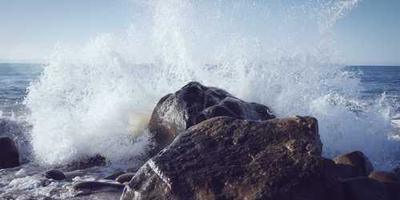

In [19]:
import requests
import io
from PIL import Image
def show_image(url):
  response = requests.get(url)
  image = Image.open(io.BytesIO(response.content))
  display(image)

show_image("https://picsum.photos/seed/city/400/200")

In [20]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"What's in this image"
        },
        {
            "type":"image_url",
            "image_url": "https://picsum.photos/seed/city/400/200"
        }
    ]
)

In [21]:
llm.invoke([message])

AIMessage(content=' The image shows a large wave crashing against a rock. The wave is white and foamy, and the rock is black and jagged. The wave is crashing over the rock, and the water is splashing up into the air. The image is taken from a low angle, and the rock is in the foreground. The background is a blue sky with white clouds.')

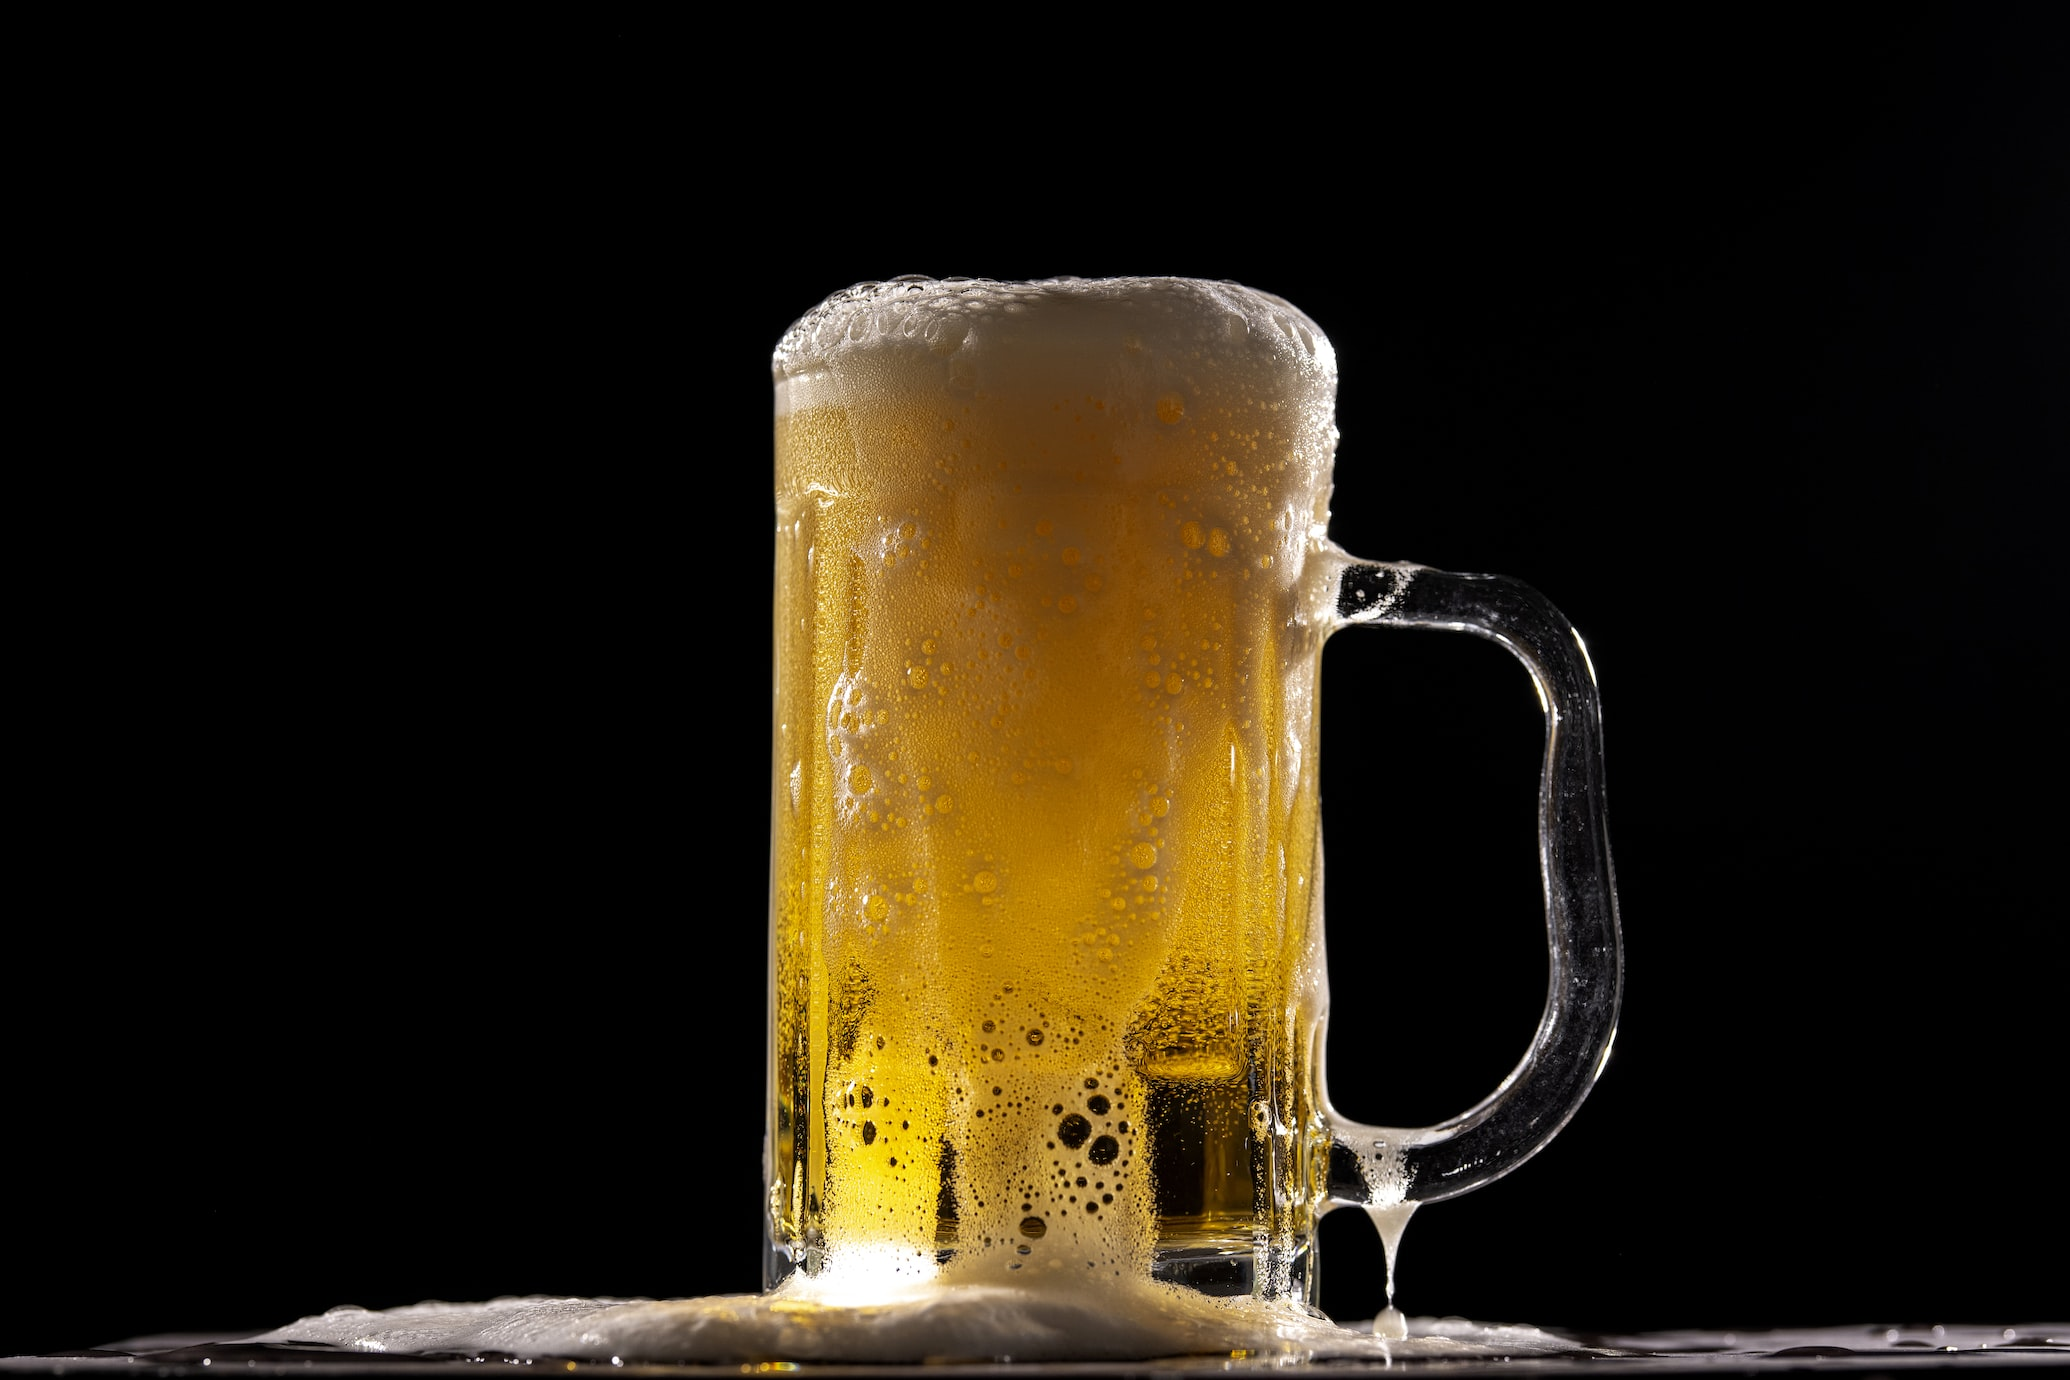

In [22]:
show_image("https://images.unsplash.com/photo-1608270586620-248524c67de9?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D")

In [23]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import  ChatGoogleGenerativeAI

In [24]:
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type" : "text",
            "text" : "Write a blog briefly discussing the advantages and disadvantages based on this picture"
        },
        {
            "type":  "image_url",
            "image_url": "https://images.unsplash.com/photo-1608270586620-248524c67de9?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
        }
    ]
)

In [25]:
result = llm.invoke([message])
to_markdown(result.content)

> There are many advantages and disadvantages to drinking beer. On the one hand, beer can be a refreshing and enjoyable beverage. It can also be a social lubricant, helping people to relax and connect with each other. Additionally, beer can be a source of nutrients, including vitamins, minerals, and antioxidants.
>
>On the other hand, beer can also have negative effects on the body. Drinking too much beer can lead to alcohol poisoning, liver damage, and other health problems. Additionally, beer can be addictive, and people who drink too much beer may find it difficult to control their intake.
>
>Ultimately, the decision of whether or not to drink beer is a personal one. There are both advantages and disadvantages to drinking beer, and each person needs to weigh these factors before making a decision.
>
>In addition to the physical effects of drinking beer, there are also some social and economic factors to consider. For example, drinking beer can be a way to connect with friends and family. It can also be a way to relax and de-stress. However, drinking too much beer can lead to problems at work or school, and it can also damage relationships.
>
>Overall, there are both advantages and disadvantages to drinking beer. Each person needs to weigh these factors before making a decision about whether or not to drink beer.

## Chat with Documents

In [26]:
!pip install langchain
!pip install pypdf
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
import warnings
warnings.filterwarnings("ignore")

In [2]:
!mkdir pdfs

In [3]:
!gdown 1r14GMGd45izsyEumuwctYuwHXCBQMNIm -O pdfs/mlpaper.pdf

Downloading...
From: https://drive.google.com/uc?id=1r14GMGd45izsyEumuwctYuwHXCBQMNIm
To: /content/pdfs/mlpaper.pdf
100% 894k/894k [00:00<00:00, 65.8MB/s]


## Text extraction From pdf

In [4]:
loader = PyPDFDirectoryLoader("pdfs")
data = loader.load_and_split()

In [5]:
print(data)

[Document(page_content='See discussions, st ats, and author pr ofiles f or this public ation at : https://www .researchgate.ne t/public ation/344717762\nMachine Learning Algorithms -A Review\nTechnic al R eport  · Januar y 2019\nDOI: 10.21275/ ART20203995\nCITATIONS\n530READS\n239,020\n1 author:\nBatt a Mahesh\nIndependent R esearcher\n5 PUBLICA TIONS \xa0\xa0\xa0532 CITATIONS \xa0\xa0\xa0\nSEE PROFILE\nAll c ontent f ollo wing this p age was uplo aded b y Batt a Mahesh  on 17 Oct ober 2020.\nThe user has r equest ed enhanc ement of the do wnlo aded file.', metadata={'source': 'pdfs/mlpaper.pdf', 'page': 0}), Document(page_content='International Journal of Science and Research (IJSR)\n \nISSN: 2319\n-\n7064\n \nResearchGate Impact Factor (2018): 0.28 \n| SJIF (2018): 7.426\n \nVolume 9 Issue 1, January 2020\n \nwww.ijsr.net\n \nLicensed Under Creative Commons Attribution CC BY\n \nMachine Learning Algorithms \n-\n \nA Review\n \n \nBatta Mahesh\n \n \nAbstract:\n \nMachine learning\n \

In [6]:
print(data[2].page_content)

International Journal of Science and Research (IJSR)
 
ISSN: 2319
-
7064
 
ResearchGate Impact Factor (2018): 0.28 
| SJIF (2018): 7.426
 
Volume 9 Issue 1, January 2020
 
www.ijsr.net
 
Licensed Under Creative Commons Attribution CC BY
 
Decision Tree
 
Decision tree is a graph to represent choices and their results 
in form of a tree. The nodes in the graph represent an event 
or choice and the edges of the graph represent the decision 
rules
 
or conditions
. 
Each tree consists of nodes and 
branches. Each node represents attributes in a group that is 
to be classified and each branch represents a value that the 
node can take
.
 
 
 
Fig
ure
: 
Decision Tree
 
 
Decision Tree Pseudo Code:
 
def 
 
decisionTreeLearning(examples, attributes, 
parent_examples):
 
if len(examples) == 0:
 
return pluralityValue(parent_examples)
 
# return most probable answer as there is no training data 
left
 
elif len(attributes) == 0:
 
return pluralityValue(examples)
 
elif (all 
examples classify

In [7]:
context = "\n".join(str(p.page_content) for p in data)

In [8]:
print("The total number of words in the context:", len(context))

The total number of words in the context: 21101


## Split the Extracted Data into Text Chunks

In [10]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=200)
context = "\n\n".join(str(p.page_content) for p in data)

In [11]:
texts = text_splitter.split_text(context)

In [12]:
print(len(texts))

3


In [13]:
texts[0]

'See discussions, st ats, and author pr ofiles f or this public ation at : https://www .researchgate.ne t/public ation/344717762\nMachine Learning Algorithms -A Review\nTechnic al R eport  · Januar y 2019\nDOI: 10.21275/ ART20203995\nCITATIONS\n530READS\n239,020\n1 author:\nBatt a Mahesh\nIndependent R esearcher\n5 PUBLICA TIONS \xa0\xa0\xa0532 CITATIONS \xa0\xa0\xa0\nSEE PROFILE\nAll c ontent f ollo wing this p age was uplo aded b y Batt a Mahesh  on 17 Oct ober 2020.\nThe user has r equest ed enhanc ement of the do wnlo aded file.\n\nInternational Journal of Science and Research (IJSR)\n \nISSN: 2319\n-\n7064\n \nResearchGate Impact Factor (2018): 0.28 \n| SJIF (2018): 7.426\n \nVolume 9 Issue 1, January 2020\n \nwww.ijsr.net\n \nLicensed Under Creative Commons Attribution CC BY\n \nMachine Learning Algorithms \n-\n \nA Review\n \n \nBatta Mahesh\n \n \nAbstract:\n \nMachine learning\n \n(\nML\n) is the\n \nscientific study\n \nof\n \nalgorithms\n \nand\n \nstatistical models\n \ntha

## Download the Embeddings from Google

In [14]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [28]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")

In [29]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever()

In [44]:
question = "KNN is instance based learning or not"
docs = vector_index.get_relevant_documents(question)

In [45]:
docs

[Document(page_content="International Journal of Science and Research (IJSR)\n \nISSN: 2319\n-\n7064\n \nResearchGate Impact Factor (2018): 0.28 \n| SJIF (2018): 7.426\n \nVolume 9 Issue 1, January 2020\n \nwww.ijsr.net\n \nLicensed Under Creative Commons Attribution CC BY\n \n \nFig\nure\n:\n \nPseudo code of Bagging\n \n \nNeu\nral Networks\n \nA neural network is a series of algorithms that endeavors to \nrecognize underlying relationships in a set of data through a \nprocess that mimics the way \nthe human brain operates. In \nthis sense, neural networks refer to systems of neurons, \neither organic or artificial in nature. Neural networks can \nadapt to changing input; so the network generates the best \npossible result without needing to redesign the out\nput \ncriteria. The concept of neural networks, which has its roots \nin\n \nartificial intelligence, is swiftly gaining popularity in the \ndevelopment of\n \ntrading systems.\n \n \n \nFigure: \nNeu\nral Networks\n \n \nAn art

## Prompt template

In [46]:
prompt_template = """
  Answer the question as detailed as possible from the provided context, make sure to provide all the details, if the answer is not in
  provided context just say, "answer is not available in the context", don't provide the wrong answer\n\n
  Context:\n {context}?\n
  Question: \n{question}\n

  Answer:
"""

prompt = PromptTemplate(template = prompt_template, input_variables = ["context", "question"])

In [47]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3)

In [48]:
chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

In [49]:
response = chain(
    {"input_documents":docs, "question": question}
    , return_only_outputs=True)

In [50]:
response

{'output_text': 'Yes, KNN is instance based learning'}